# **Imports**

In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv
import numpy as np
from datetime import datetime, timedelta

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Data Prep**

In [2]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/AzureFunctionsInvocationTraceForTwoWeeksJan2021.csv')
data['counter'] = range(1,len(data)+1)
data['start_timestamp'] = (data['end_timestamp']-data['duration'])
date = '2021-01-31'
time = '00:00:00.0'
start_date = datetime.strptime(date + ' ' + time, "%Y-%m-%d %H:%M:%S.%f")
data['datetime'] = start_date + pd.TimedeltaIndex(data['start_timestamp'], unit='s')
data['date'] = data['datetime']
data = data.set_index('datetime')
data['DatetimeNumeric'] = pd.to_datetime(data['date'])
data['DatetimeNumeric'] = data['DatetimeNumeric'].map(datetime.timestamp)
data['wait'] = round(data['start_timestamp'].diff()*1000,0)
data.wait = data.wait.fillna(0).astype(int)
data

,app,func,end_timestamp,duration,counter,start_timestamp,date,DatetimeNumeric,wait
datetime,,,,,,,,,
2021-01-31 00:00:00.001490900,7b2c43a2bc30f6bb438074df88b603d2cb982d3e7961de...,e3cdb48830f66eb8689cc0223514569a69812b77e6611e...,7.949090e-02,0.078,1,1.490900e-03,2021-01-31 00:00:00.001490900,1.612051e+09,0
2021-01-31 00:00:00.003860041,1573b95c039e51cc012b543a4af3bc7c3ee9485acbb003...,337cd24a7d5fd5c92460faee4ebe6a186a0eb322bd17b7...,5.715786e+01,57.154,2,3.860041e-03,2021-01-31 00:00:00.003860041,1.612051e+09,2
2021-01-31 00:00:00.005477905,1573b95c039e51cc012b543a4af3bc7c3ee9485acbb003...,48cc770d590d3c5a7691b3b4e9302f82ec3be5ddc2a037...,5.913048e+01,59.125,3,5.477905e-03,2021-01-31 00:00:00.005477905,1.612051e+09,2
2021-01-31 00:00:00.016541065,f274d71de386ccc77e4ca74766dbc485461c3053059d47...,3d2aee54a133509f16fb636d74128c2adcfcac71c6dcef...,6.252541e+00,6.236,4,1.654107e-02,2021-01-31 00:00:00.016541065,1.612051e+09,11
2021-01-31 00:00:00.016823959,7b2c43a2bc30f6bb438074df88b603d2cb982d3e7961de...,68bbfd828223a505d7917339f4656c5f33ff93225cdb9d...,6.682396e-02,0.050,5,1.682396e-02,2021-01-31 00:00:00.016823959,1.612051e+09,0
...,...,...,...,...,...,...,...,...,...
2021-02-13 23:59:56.700016903,a594f92f84072b4cd031fe5283d1781a6e98f430696dec...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,1.209597e+06,0.001,1980947,1.209597e+06,2021-02-13 23:59:56.700016903,1.613261e+09,370
2021-02-13 23:59:58.190409111,a594f92f84072b4cd031fe5283d1781a6e98f430696dec...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,1.209598e+06,0.001,1980948,1.209598e+06,2021-02-13 23:59:58.190409111,1.613261e+09,1490
2021-02-13 23:59:58.560518908,a594f92f84072b4cd031fe5283d1781a6e98f430696dec...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,1.209599e+06,0.001,1980949,1.209599e+06,2021-02-13 23:59:58.560518908,1.613261e+09,370


In [3]:
def interQuartile(df_):
  for x in ['wait']:
      q75,q25 = np.percentile(df_.loc[:,x],[75,25])
      intr_qr = q75-q25
  
      max = q75+(1.5*intr_qr)
      min = q25-(1.5*intr_qr)
  
      df_.loc[df_[x] < min,x] = np.nan
      df_.loc[df_[x] > max,x] = np.nan

  df_ = df_.dropna(axis = 0)
  df_.isnull().sum()
  return df_

In [4]:
# 04/02/2021 12:00 - 18:00

df_1 = data.copy()
start_date_obj = datetime.strptime('2021-02-04 12', "%Y-%m-%d %H")
end_date_obj = datetime.strptime('2021-02-04 18', "%Y-%m-%d %H")
mask = (df_1['date'] > start_date_obj) & (df_1['date'] <= end_date_obj)
df_1 = df_1.loc[mask]

In [25]:
# 31/01/2021 00:00 - 12/02/2021 18:00

df1 = data.copy()
start_date_obj = datetime.strptime('2021-01-31', "%Y-%m-%d")
end_date_obj = datetime.strptime('2021-02-04 18', "%Y-%m-%d %H")
# setting test count
end_temp = end_date_obj - timedelta(hours=6)
test = (df1['date'] > end_temp) & (df1['date'] <= end_date_obj)
test_count = len(df1.loc[test])
# continuing with data frame prep
mask = (df1['date'] > start_date_obj) & (df1['date'] <= end_date_obj)
df1 = df1.loc[mask]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


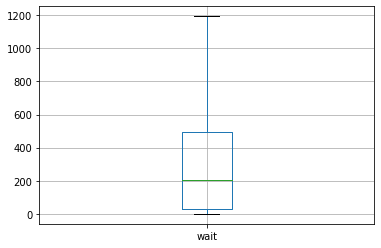

In [5]:
df_1 = interQuartile(df_1)
df_1 = interQuartile(df_1)
df_1 = interQuartile(df_1)
df_1 = interQuartile(df_1)
df_1 = interQuartile(df_1)
df_1 = interQuartile(df_1)
df_1 = interQuartile(df_1)
df_1 = interQuartile(df_1)
df_1 = interQuartile(df_1)
df_1 = interQuartile(df_1)
df_1 = interQuartile(df_1)
wait_col = ['wait']
df_1.boxplot(wait_col)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


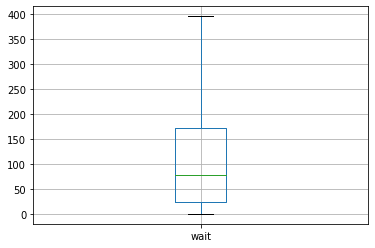

In [26]:
df1 = interQuartile(df1)
df1 = interQuartile(df1)
df1 = interQuartile(df1)
df1 = interQuartile(df1)
df1 = interQuartile(df1)
df1 = interQuartile(df1)
df1 = interQuartile(df1)
df1 = interQuartile(df1)
df1 = interQuartile(df1)
df1 = interQuartile(df1)
df1 = interQuartile(df1)
df1 = interQuartile(df1)
df1 = interQuartile(df1)
df1 = interQuartile(df1)
df1 = interQuartile(df1)
wait_col = ['wait']
df1.boxplot(wait_col)

### **Azure Dataset for JMeter**

In [6]:
df_1_copy = df_1.copy()
df_1_copy = df_1_copy.drop(['counter', 'DatetimeNumeric', 'wait'], axis=1)
df_1_copy = df_1_copy[::4]
df_1_copy = df_1_copy[::2]
df_1_copy['func'] = '155e47f8e7f751d0c845049456d01832013c61336a8cd85901330ac821a71534'
df_1_copy['counter'] = range(1,len(df_1_copy)+1)
df_1_copy['wait'] = round(df_1_copy['start_timestamp'].diff()*1000,0)
df_1_copy.wait = df_1_copy.wait.fillna(0).astype(int)
df_1_copy

,app,func,end_timestamp,duration,start_timestamp,date,counter,wait
datetime,,,,,,,,
2021-02-04 12:00:00.002758930,734272c01926d19690e5ec308bab64ef97950b75b1c758...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,388804.779759,4.777,388800.002759,2021-02-04 12:00:00.002758930,1,0
2021-02-04 12:00:00.025184965,734272c01926d19690e5ec308bab64ef97950b75b1c758...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,388801.425185,1.400,388800.025185,2021-02-04 12:00:00.025184965,2,22
2021-02-04 12:00:01.249908108,17c37a0fdd5d1932b755c0e6447137bc08fd524f455e14...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,388801.280908,0.031,388801.249908,2021-02-04 12:00:01.249908108,3,1225
2021-02-04 12:00:22.613737055,734272c01926d19690e5ec308bab64ef97950b75b1c758...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,388827.492737,4.879,388822.613737,2021-02-04 12:00:22.613737055,4,21364
2021-02-04 12:00:27.810958916,734272c01926d19690e5ec308bab64ef97950b75b1c758...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,388917.454959,89.644,388827.810959,2021-02-04 12:00:27.810958916,5,5197
...,...,...,...,...,...,...,...,...
2021-02-04 17:54:50.807165886,d27353c8ad7c924a609457eb5a53333a7e519bcf8efd88...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,410095.731166,4.924,410090.807166,2021-02-04 17:54:50.807165886,2523,67065
2021-02-04 17:55:00.032326901,f274d71de386ccc77e4ca74766dbc485461c3053059d47...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,410111.743327,11.711,410100.032327,2021-02-04 17:55:00.032326901,2524,9225
2021-02-04 17:57:00.030447090,734272c01926d19690e5ec308bab64ef97950b75b1c758...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,410220.167447,0.137,410220.030447,2021-02-04 17:57:00.030447090,2525,119998


In [ ]:
df_1_copy.to_csv('gdrive/My Drive/Colab Notebooks/data/Experiment_1_2_AzureDataset.csv', sep=',', encoding='utf-8')

# **Linear Regression**

Text(0, 0.5, 'time')

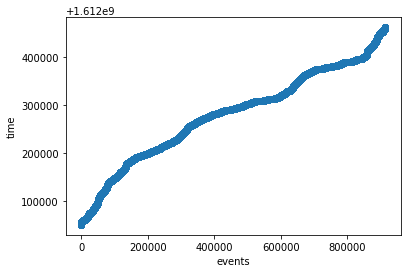

In [27]:
events = df1['counter']
time = df1['DatetimeNumeric']
plt.scatter(events, time)
plt.xlabel('events')
plt.ylabel('time')

In [28]:
def get_predictions(model, x):
  alpha_hat = model['alpha_hat']
  beta_hat = model['beta_hat']
  return alpha_hat + beta_hat * x

def get_predictions_list(n):
  n = n + 1
  lst = []
  for i in range(max(events)+1,max(events)+n):
      lst.append(i)
  return lst

def mean_squared_error(y, y_predictions):
  n = len(y)
  return np.sum(np.square(y - y_predictions)) / n

def mean_absolute_error(y, y_predictions):
  n = len(y)
  return np.sum(np.abs(y - y_predictions)) / n

def get_best_model(x, y):
  x_bar = np.average(x)
  y_bar = np.average(y)
  top = np.sum((x - x_bar)*(y - y_bar))
  bot = np.sum((x - x_bar)**2)
  beta_hat = top / bot
  alpha_hat = y_bar - beta_hat*x_bar
  model = {'alpha_hat':alpha_hat, 'beta_hat':beta_hat}
  return model

events_np = events.to_numpy()
time_np = time.to_numpy()
best_model = get_best_model(events_np, time_np)
print(best_model)
mse1 = mean_squared_error(get_predictions(best_model, events_np), events)
print(mse1)
mae1 = mean_absolute_error(get_predictions(best_model, events_np), events)
print(mae1)

{'alpha_hat': 1612117860.0134578, 'beta_hat': 0.35524009855937805}
2.597938435748373e+18
1611812150.5595696


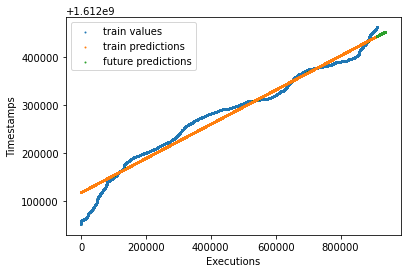

In [29]:
n_predictions = test_count
s = [1**n for n in range(len(events))]
s_predictions = [1**n for n in range(n_predictions)]
events = df1['counter']
time = df1['DatetimeNumeric']

plt.scatter(events, time, s=s, label='train values')
plt.scatter(events, get_predictions(best_model, events_np), s=s, label='train predictions')
plt.scatter(np.asarray(get_predictions_list(n=n_predictions)), get_predictions(best_model, np.asarray(get_predictions_list(n=n_predictions))), s=s_predictions, label='future predictions')
plt.xlabel('Executions')
plt.ylabel('Timestamps')
plt.legend(loc="upper left")

### **Linear Regression Predictions**

In [43]:
predictions = get_predictions(best_model, np.asarray(get_predictions_list(n=n_predictions)))
linearRegression = pd.DataFrame(predictions, columns = ['Predictions'])
linearRegression['wait'] = round(linearRegression['Predictions'].diff()*1000,0)
linearRegression['wait'] = linearRegression['wait'].fillna(linearRegression['wait'][1])
linearRegression.tail()

,Predictions,wait
24497,1.612451e+09,355.0
24498,1.612451e+09,355.0
24499,1.612451e+09,355.0
24500,1.612451e+09,355.0
24501,1.612451e+09,355.0


In [44]:
linearRegression_copy = (linearRegression['wait']*20).astype(int)
linearRegression_copy = linearRegression_copy[::4]
linearRegression_copy = linearRegression_copy[::2]
linearRegression_copy.to_csv('gdrive/My Drive/Colab Notebooks/data/experiment_1_2_times.csv', sep=',', encoding='utf-8')